In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
#read the data
df = pd.read_csv('/content/drive/MyDrive/Employee Attrition/HR_Employee_Attrition_Data.csv')

In [35]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [36]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [37]:
#check for any Duplication
df.duplicated().any()

False

In [38]:
#check for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [39]:
#5 point summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [40]:
#target&independent variable
X = df.drop('Attrition',axis=1)
y = df['Attrition'].map({'Yes':1, 'No':0})

In [41]:
#Get the Attrition (Event) 
y.mean()

0.16122448979591836

<h1> Split features into Numerical and Categorical

In [42]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [43]:
def unique_counts(var):
    counts = var.value_counts().count()
    return counts
unique_df = pd.DataFrame(num.apply(lambda x:unique_counts(x)))
unique_df

,0
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EmployeeNumber,2940
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5


In [44]:
#dropping employee number column
num = num.drop('EmployeeNumber', axis=1)

In [45]:
#dropping features with zero variance
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [46]:
unique_df = pd.DataFrame(num_1.apply(lambda x:unique_counts(x)), columns=['count'])
unique_df

,count
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4
MonthlyIncome,1349


In [47]:
slice1 = unique_df[unique_df['count']<=20]
cat_list = slice1.index
cat = num.loc[:,cat_list]
cat.dtypes

Education                   int64
EnvironmentSatisfaction     int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [48]:
slice2 = unique_df[unique_df['count']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

Age                  int64
DailyRate            int64
DistanceFromHome     int64
HourlyRate           int64
MonthlyIncome        int64
MonthlyRate          int64
TotalWorkingYears    int64
YearsAtCompany       int64
dtype: object

In [49]:
char=pd.concat([char,cat],axis=1,join="inner")
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,2,3,2,4,8,11,3,1,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,3,2,2,2,1,23,4,4,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,4,2,1,3,6,15,3,2,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,4,3,1,3,1,11,3,3,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,3,1,2,9,12,3,4,1,3,3,2,2,2


<h1> Outlier Analysis of Numerical Features

In [50]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.133819,403.440447,8.105485,20.325969,4707.155770,7116.575021,7.779458,6.125483
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1372.260000,2324.170000,1.000000,0.000000
5%,24.000000,164.000000,1.000000,33.000000,2097.000000,3376.000000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000


<h1> Capping and Flooring of outliers

In [51]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.25))
    x=x.clip(upper=x.quantile(0.75))
    return(x)

In [52]:
num=num.apply(lambda x : outlier_cap(x))

In [53]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.229932,806.478231,7.447619,66.030612,5358.883673,14272.105442,10.023810,5.842177
std,5.232029,283.974994,4.787805,14.675337,2175.901090,5087.196950,3.618425,2.511814
min,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
1%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
5%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
10%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8045.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,84.000000,8380.000000,20462.000000,15.000000,9.000000


<h1> Bi Variate Analysis (Feature Discretization)

In [54]:
from sklearn.preprocessing import KBinsDiscretizer
kbin = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbin.fit_transform(num), index=num.index, columns=num.columns,).add_suffix('_rank')
num_binned.head()

,Age_rank,DailyRate_rank,DistanceFromHome_rank,HourlyRate_rank,MonthlyIncome_rank,MonthlyRate_rank,TotalWorkingYears_rank,YearsAtCompany_rank
0,5.0,5.0,0.0,5.0,4.0,5.0,2.0,1.0
1,5.0,0.0,3.0,2.0,3.0,5.0,3.0,2.0
2,3.0,5.0,0.0,5.0,0.0,0.0,1.0,0.0
3,1.0,5.0,1.0,1.0,0.0,5.0,2.0,2.0
4,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0


In [55]:
num_combined = pd.concat([num, y], axis=1, join='inner')

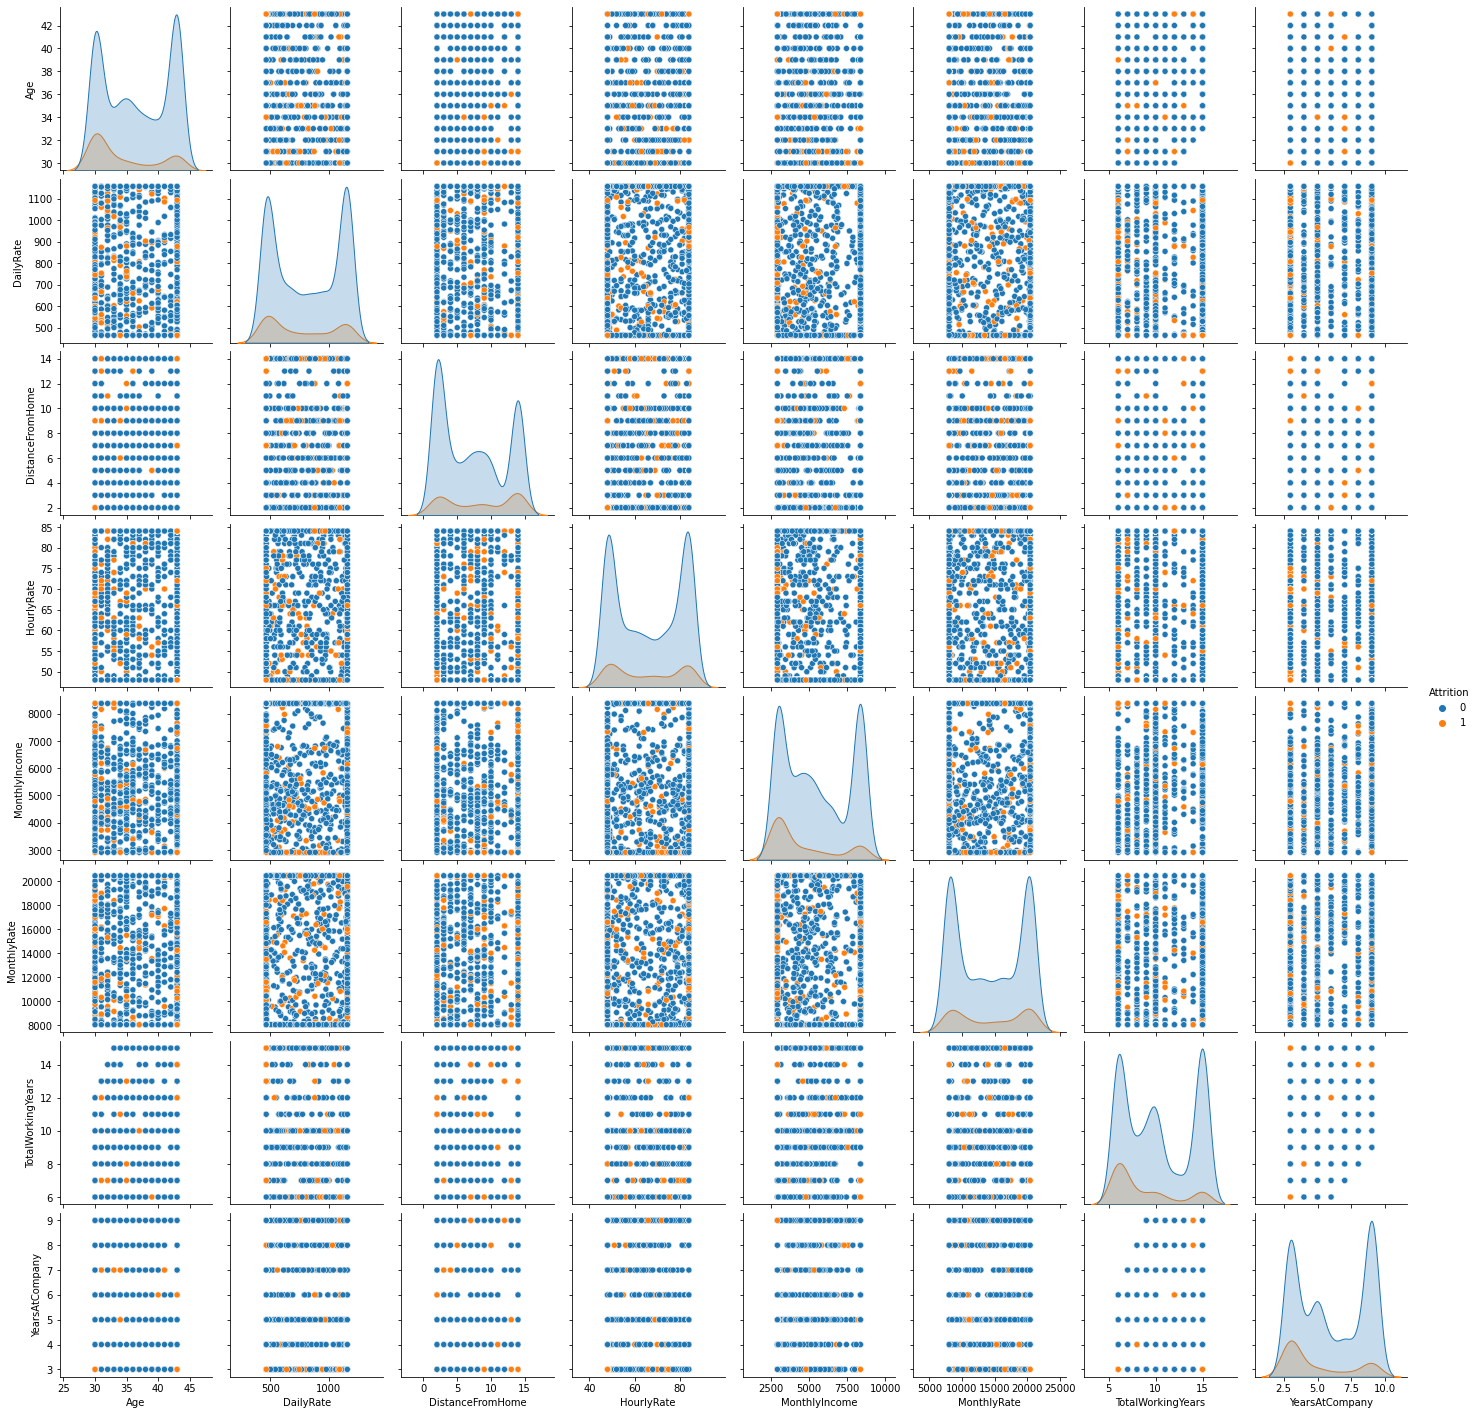

In [56]:
sns.pairplot(data=num_combined, hue='Attrition')

# By visualizing with the plot,it seems to be non-linear classifier hence non linear classifier like SVM could perform better

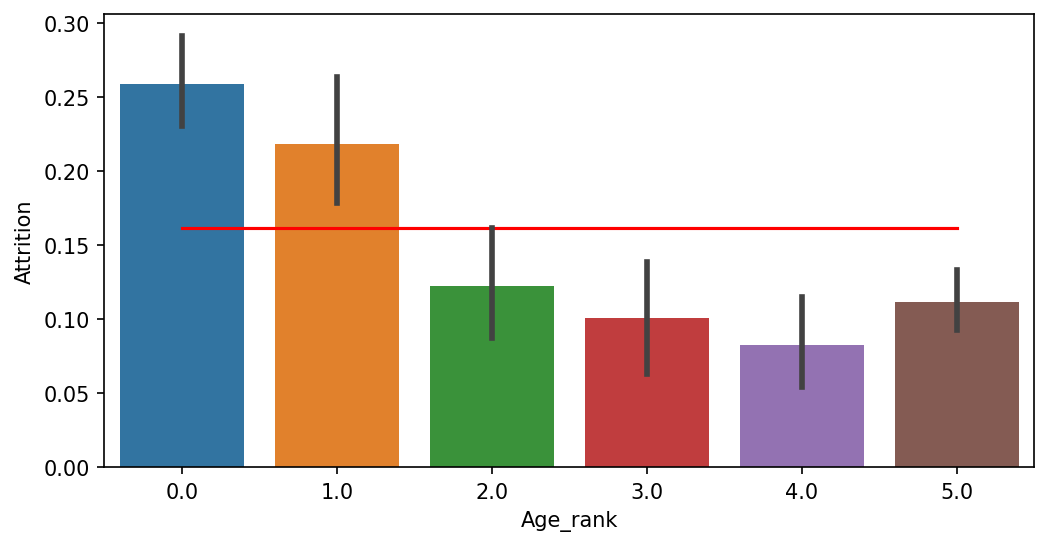

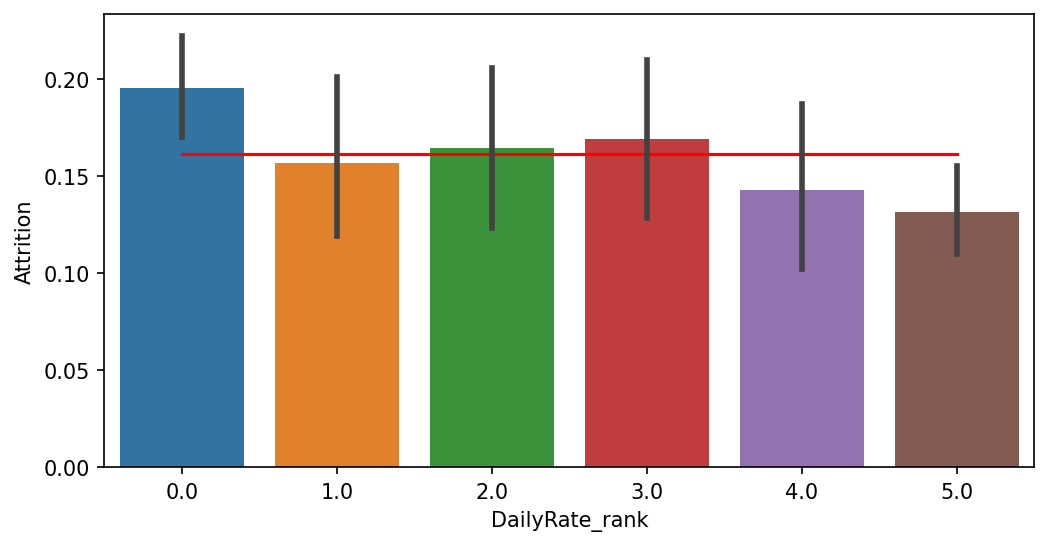

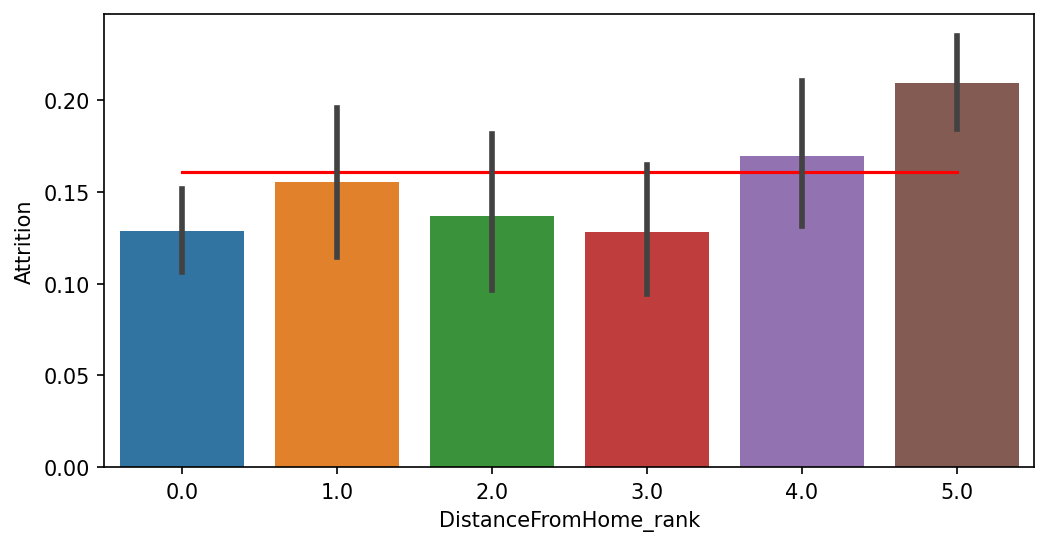

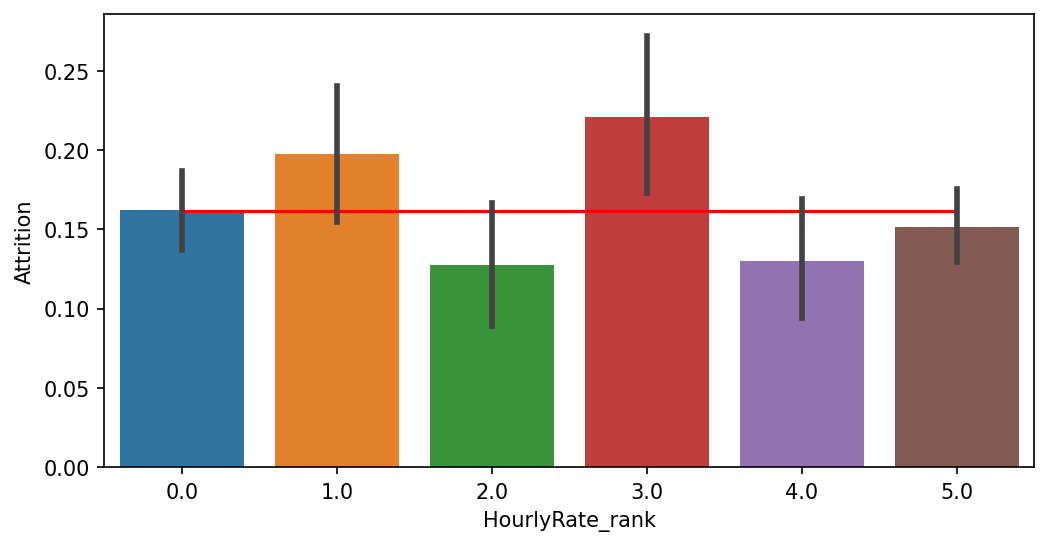

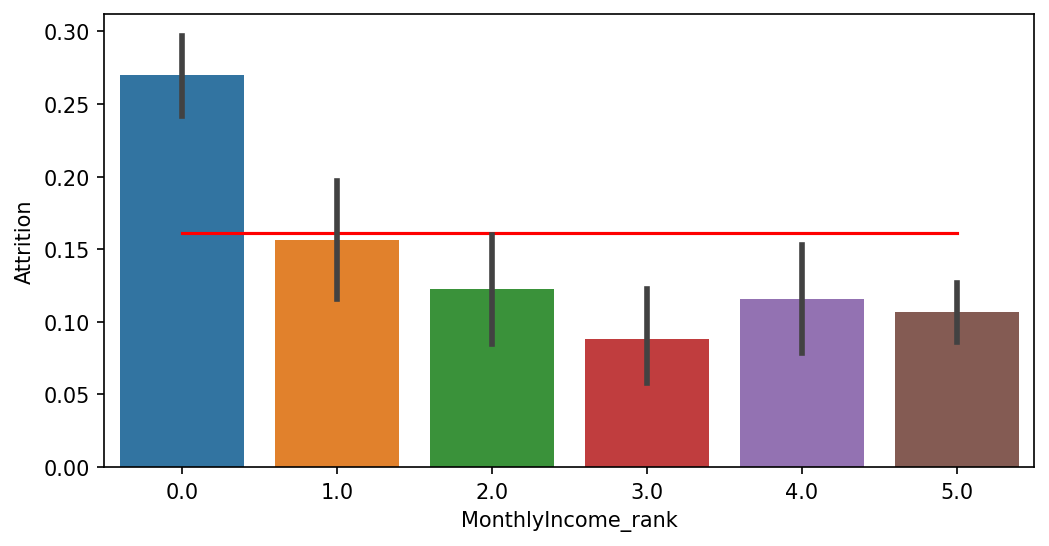

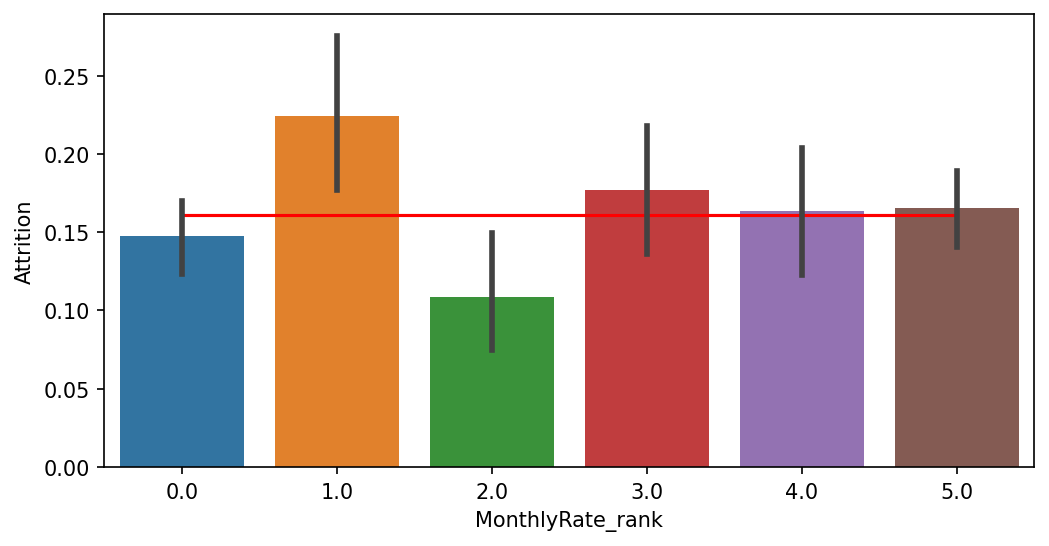

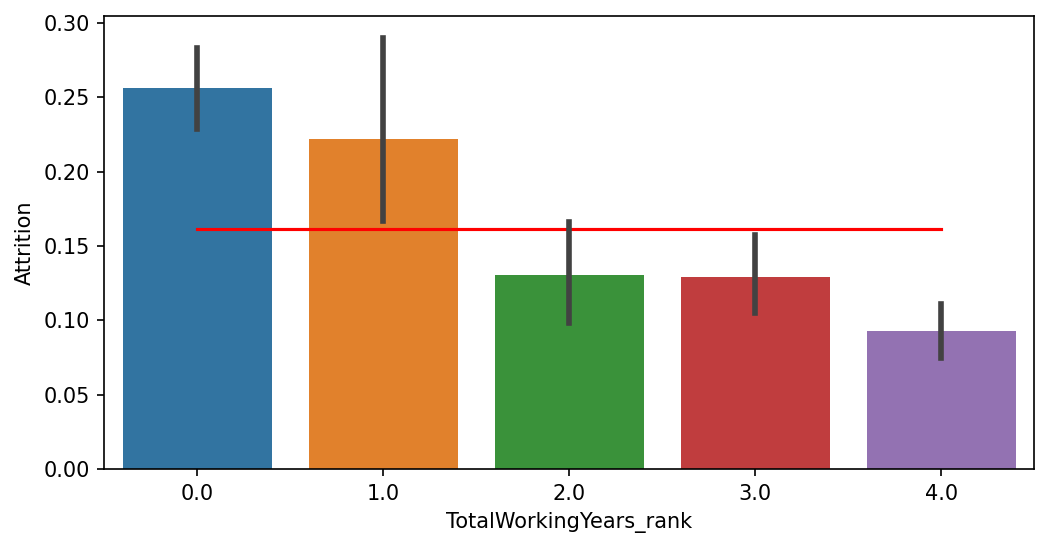

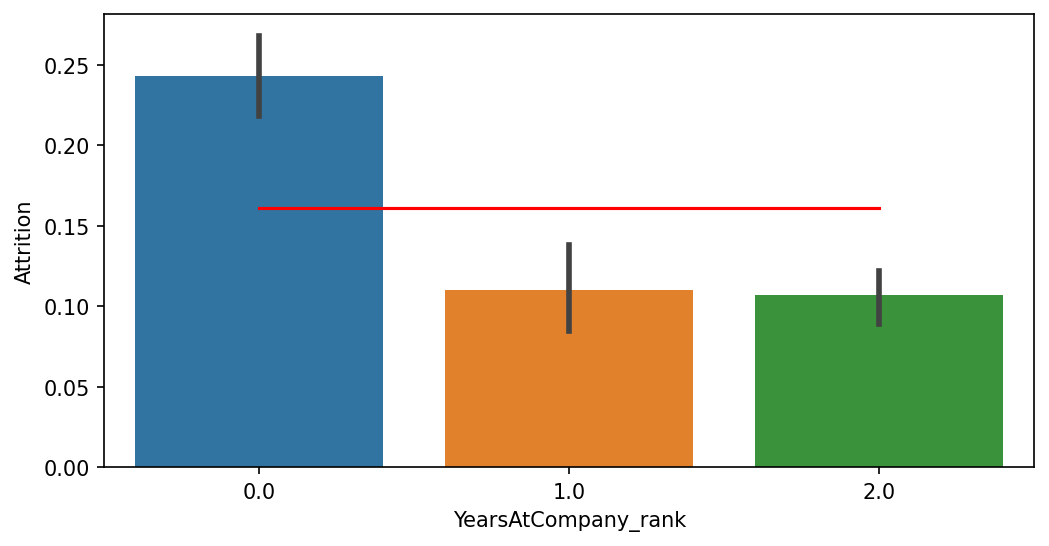

In [57]:
X_bin_combined = pd.concat([num_binned, y], axis=1, join='inner')
for col in num_binned.columns:
    plt.figure(figsize=(8,4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='Attrition', data=X_bin_combined, estimator=np.mean)
plt.show()

In [58]:
num = num.drop(['DailyRate', 'HourlyRate', 'MonthlyRate'],axis=1)

In [59]:
num.dtypes

Age                  float64
DistanceFromHome     float64
MonthlyIncome        float64
TotalWorkingYears    float64
YearsAtCompany       float64
dtype: object

In [60]:
num.corr()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany
Age,1.000000,-0.021170,0.416730,0.593813,0.189900
DistanceFromHome,-0.021170,1.000000,0.002084,-0.010710,0.023361
MonthlyIncome,0.416730,0.002084,1.000000,0.637399,0.421933
TotalWorkingYears,0.593813,-0.010710,0.637399,1.000000,0.516136
YearsAtCompany,0.189900,0.023361,0.421933,0.516136,1.000000


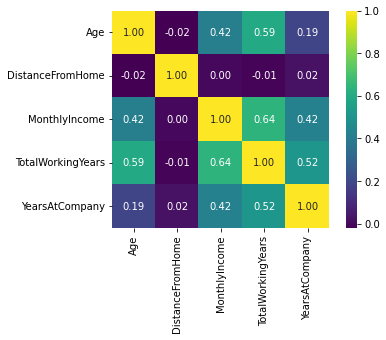

In [61]:
sns.heatmap(num.corr(), fmt='.2f', square=True, annot=True, cmap='viridis')

In [32]:
# num = num.drop('MonthlyIncome', axis=1)

<h1> Feature Selection - Categorical Features

In [62]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [63]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]
char.dtypes

BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
OverTime                    object
Education                    int64
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

<h1> Bi Variate Analysis

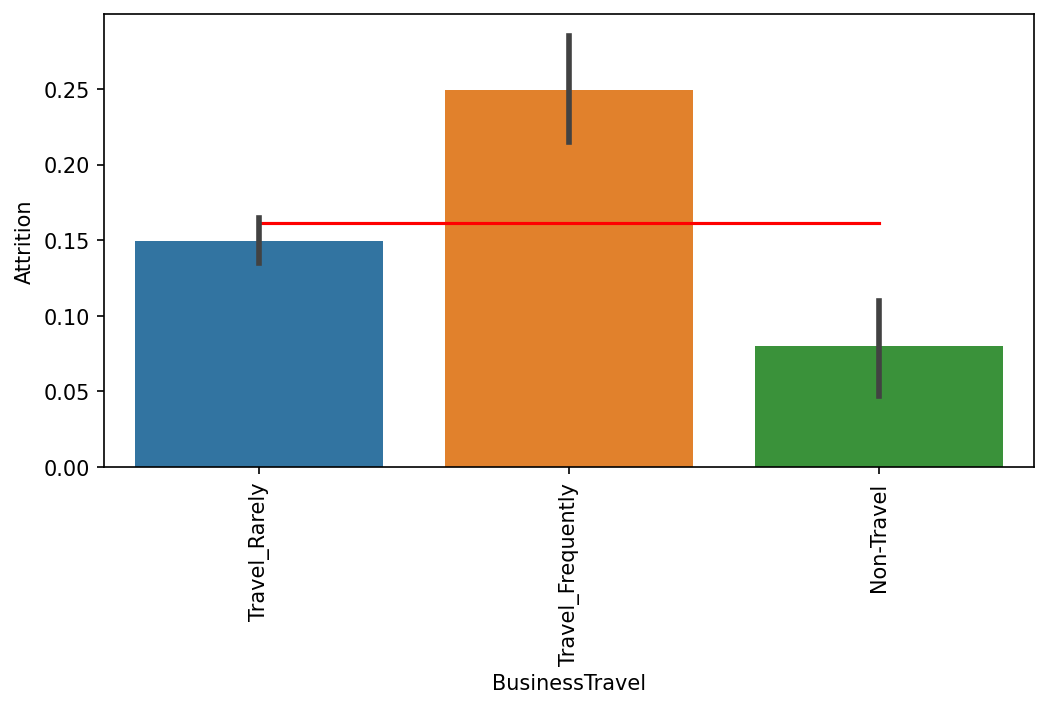

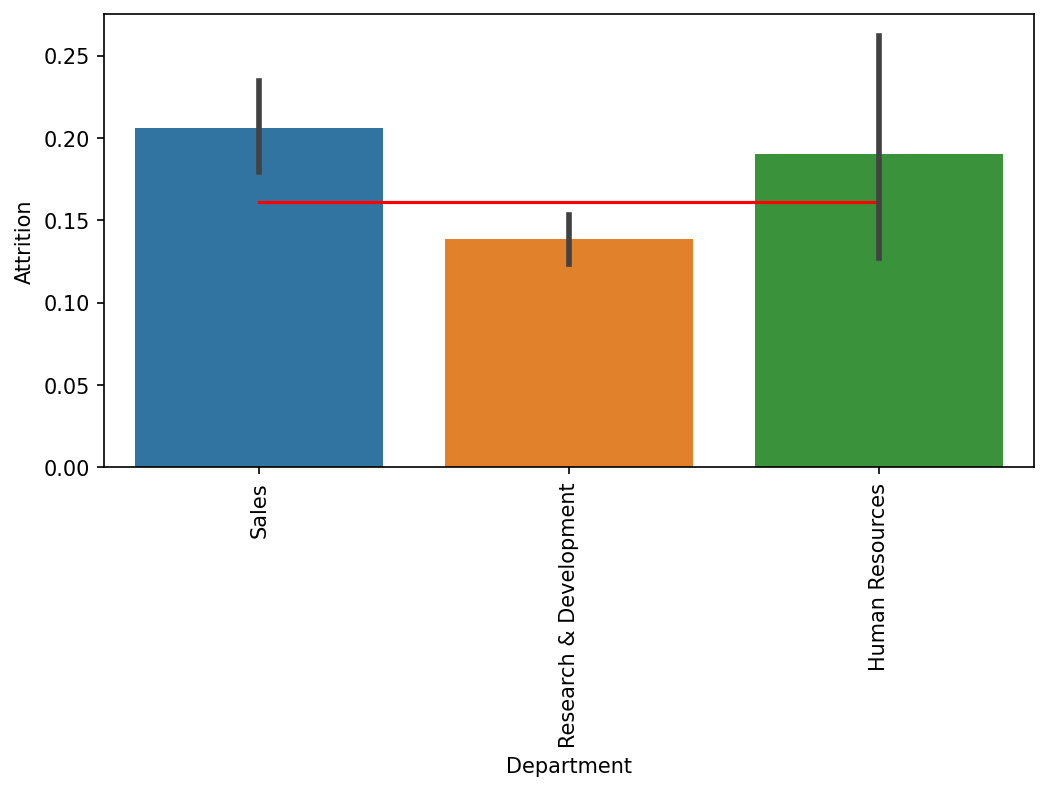

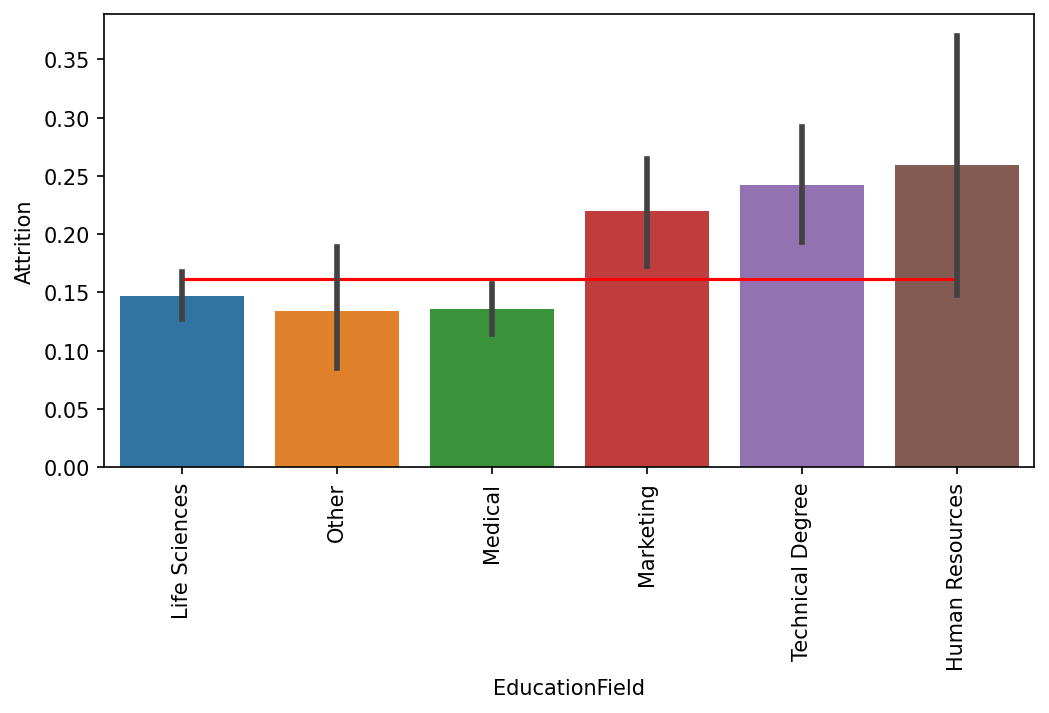

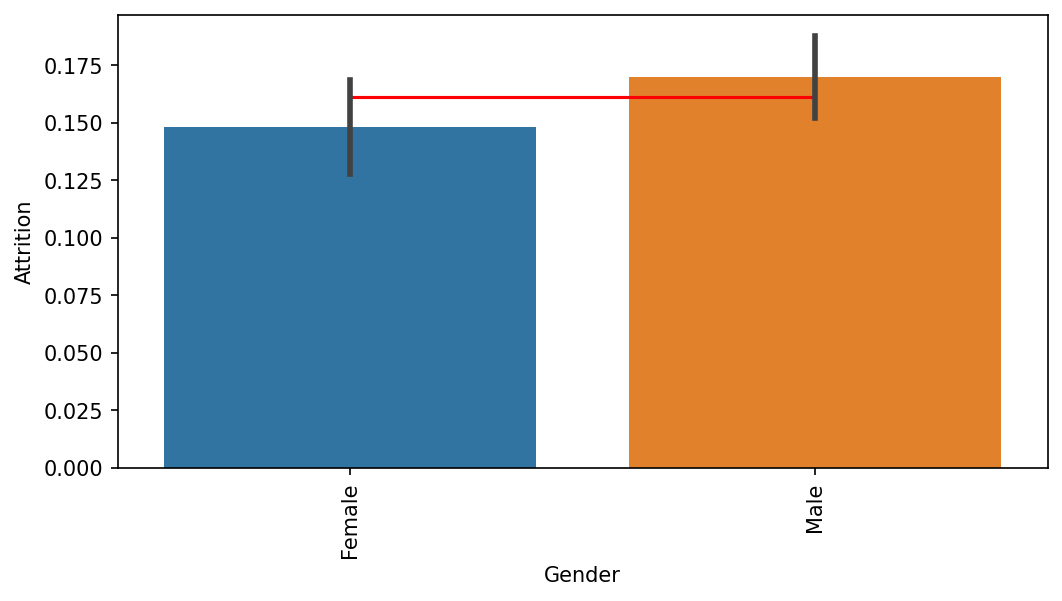

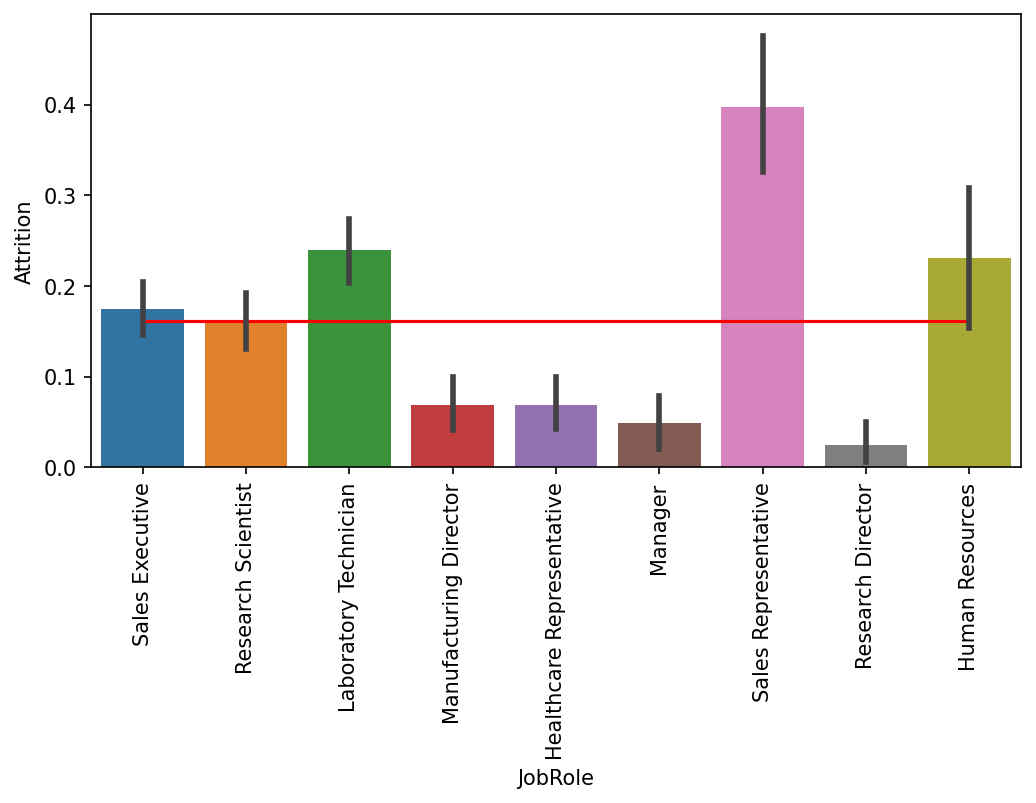

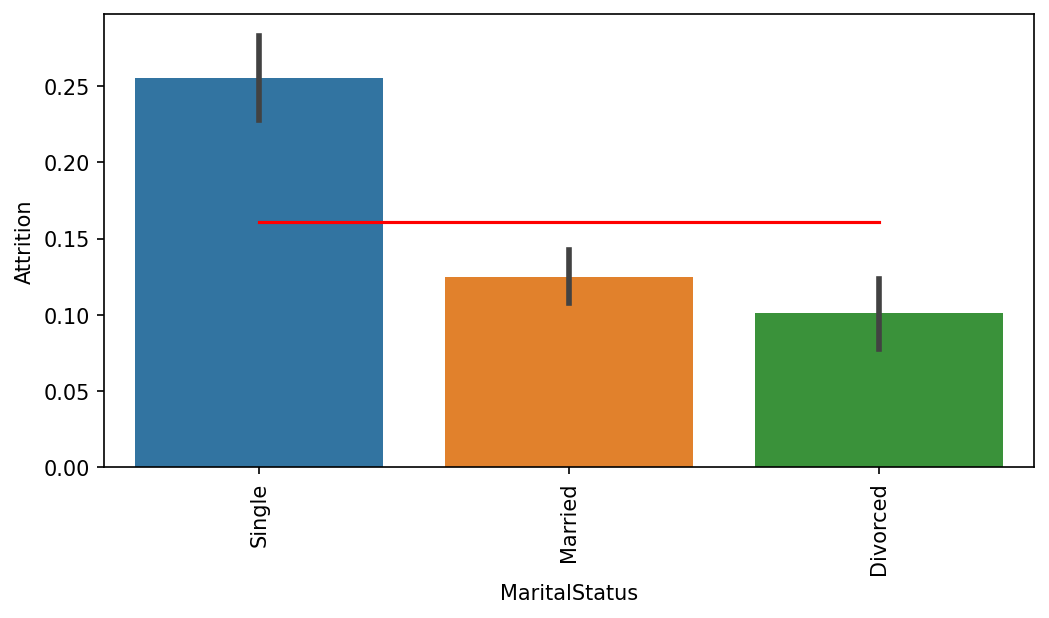

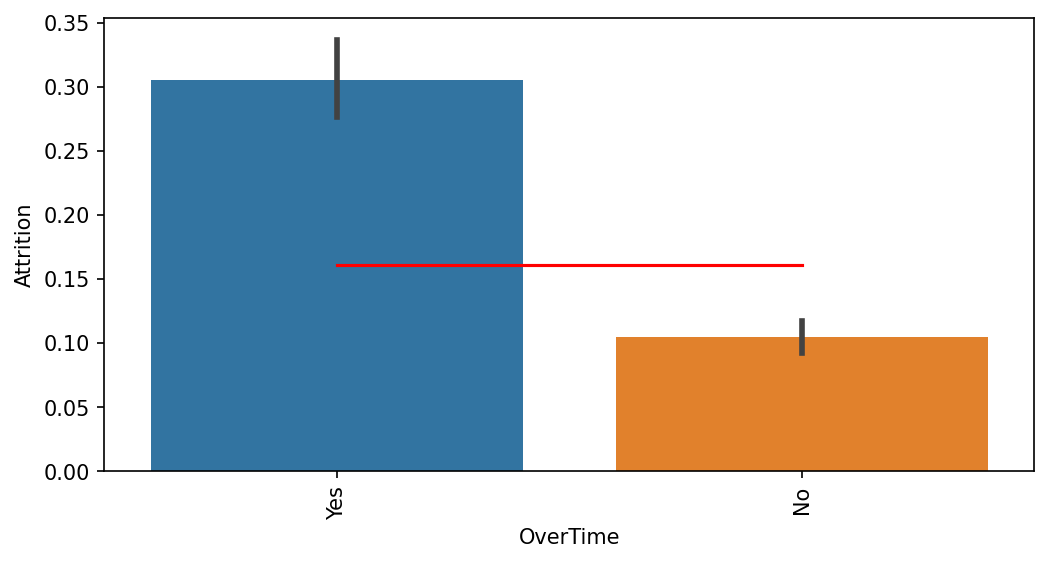

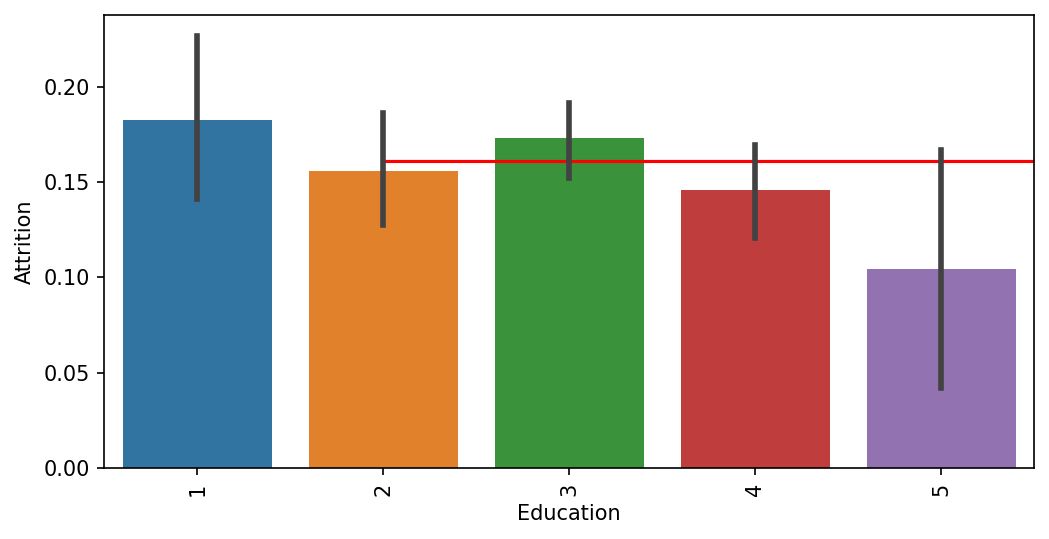

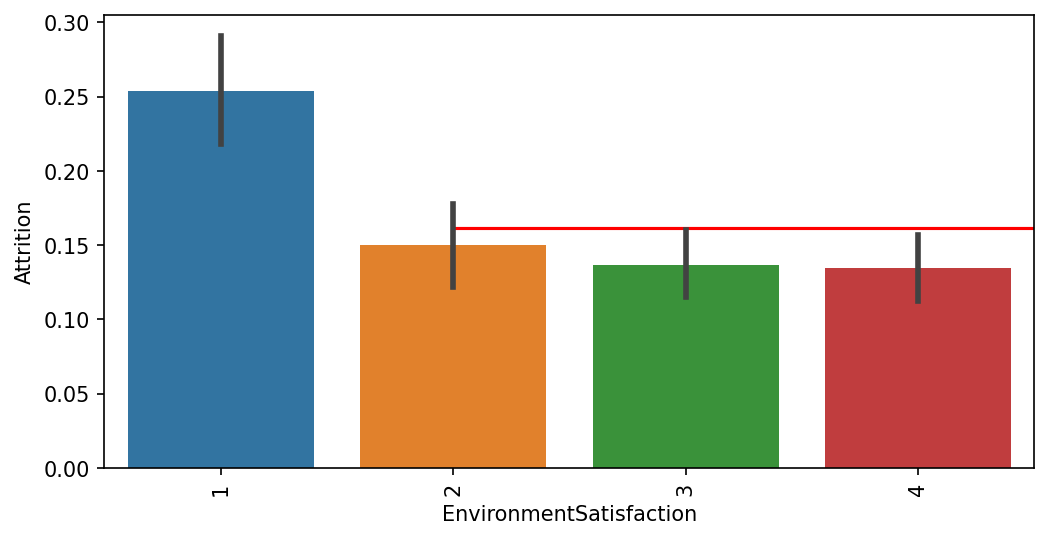

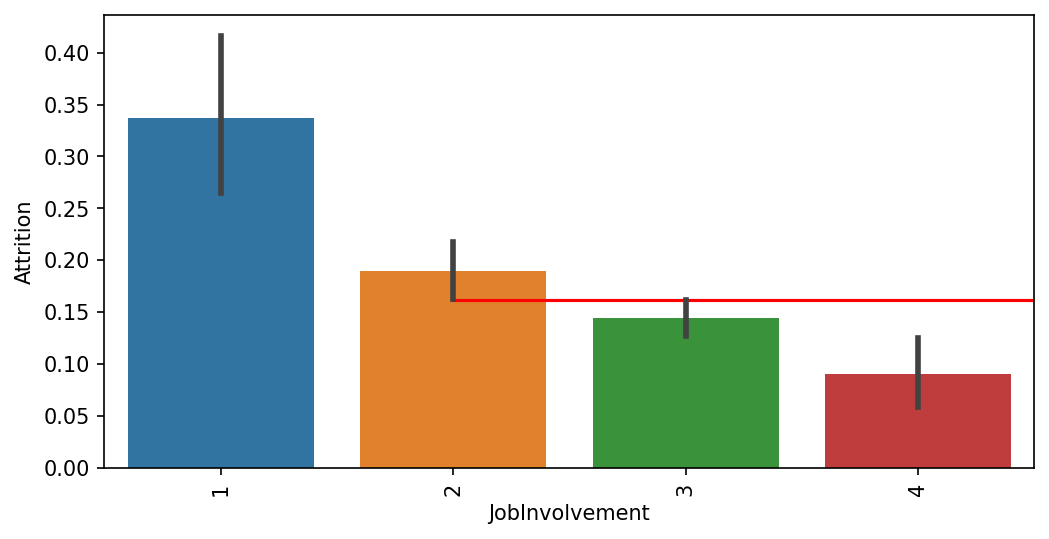

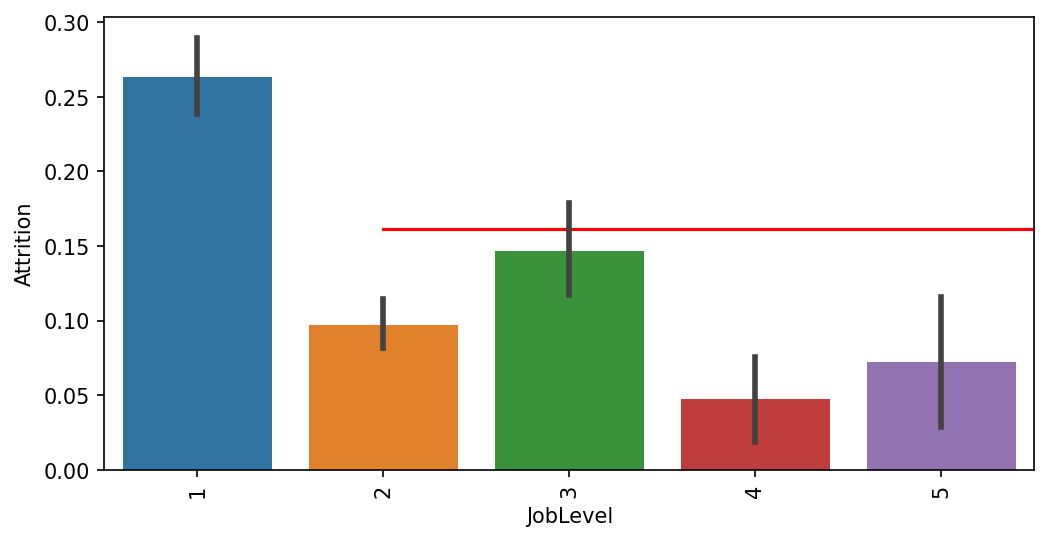

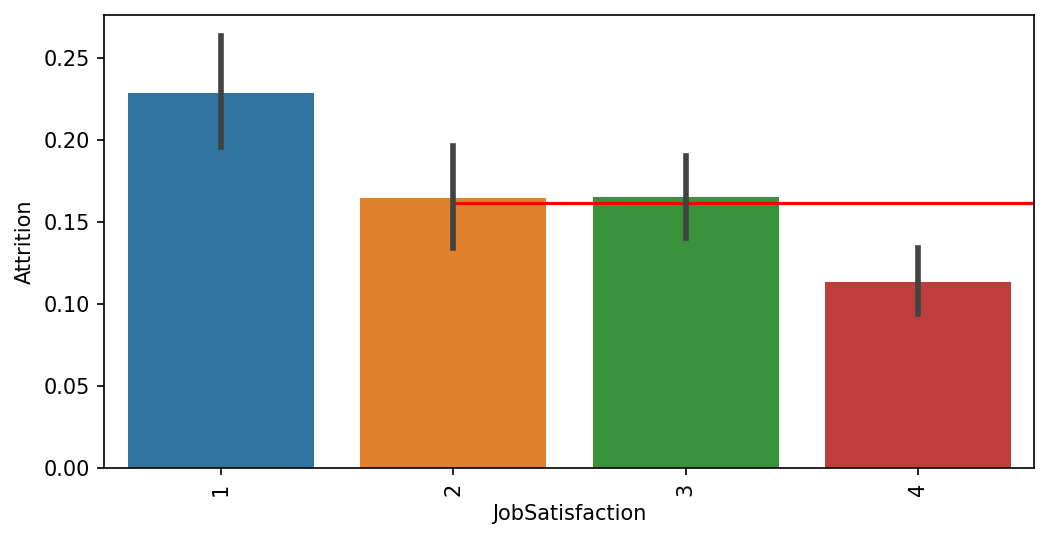

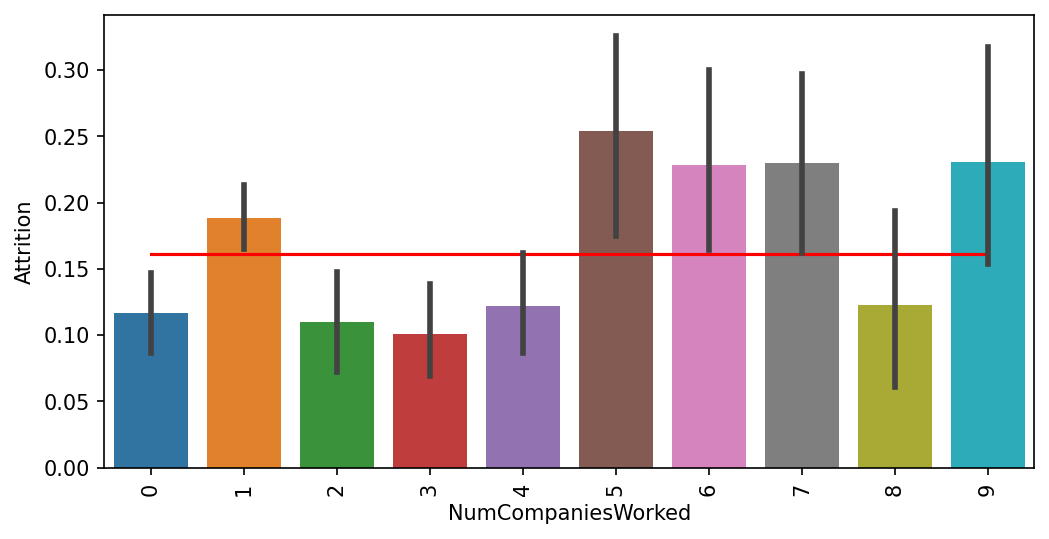

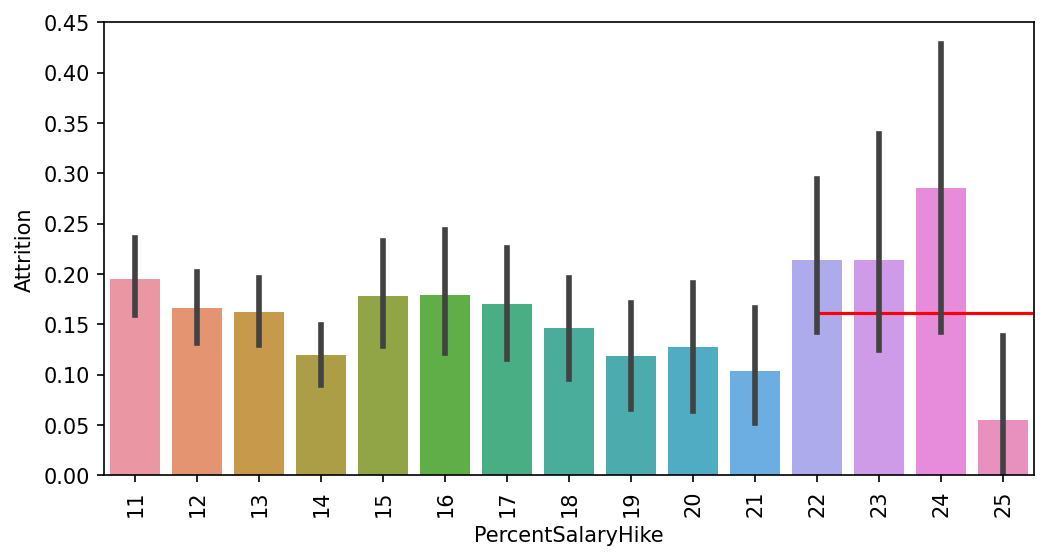

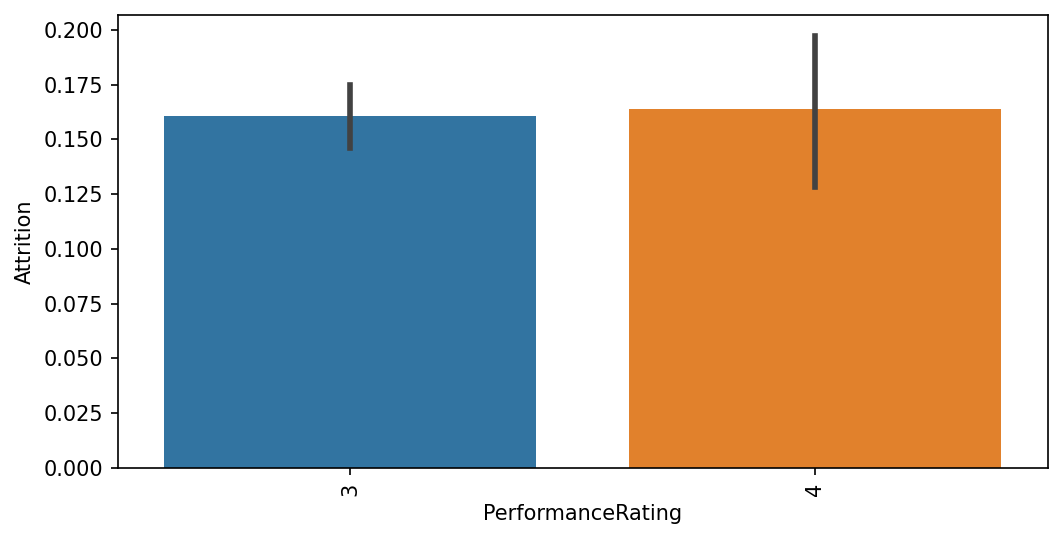

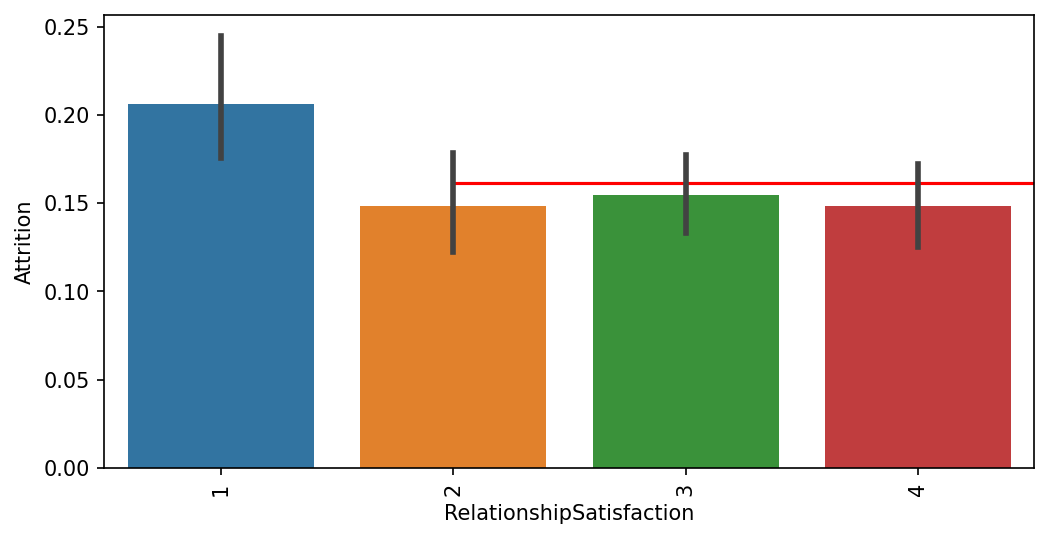

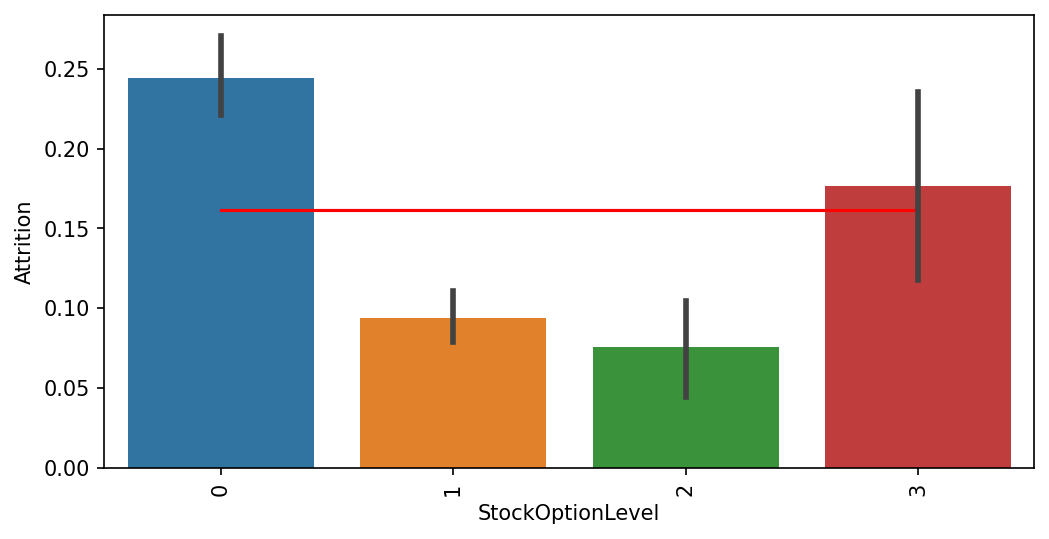

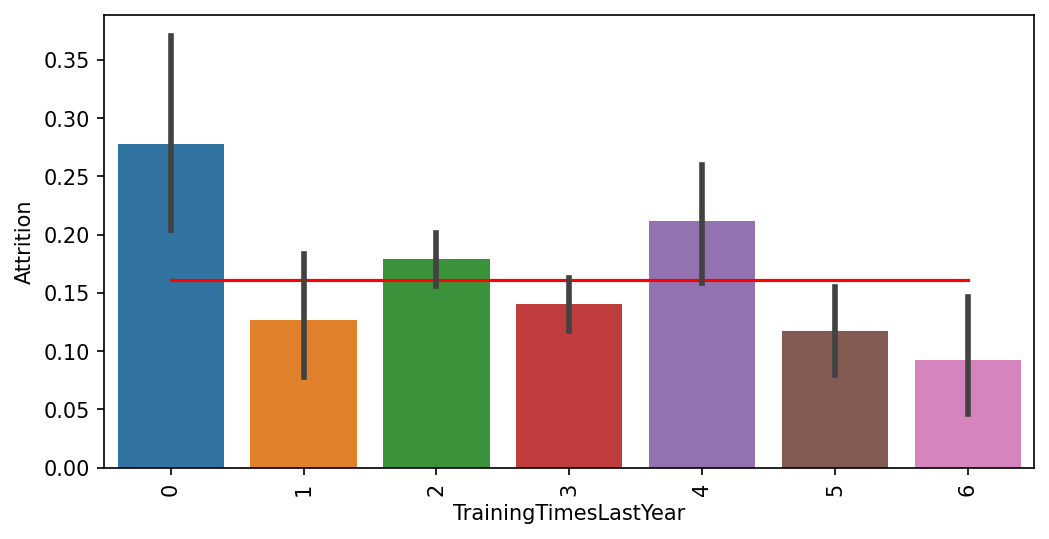

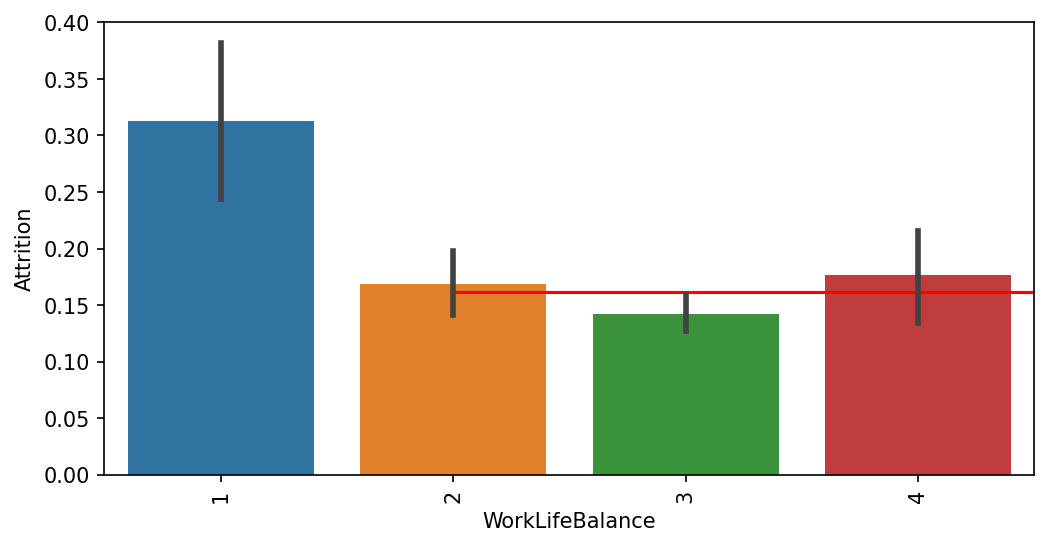

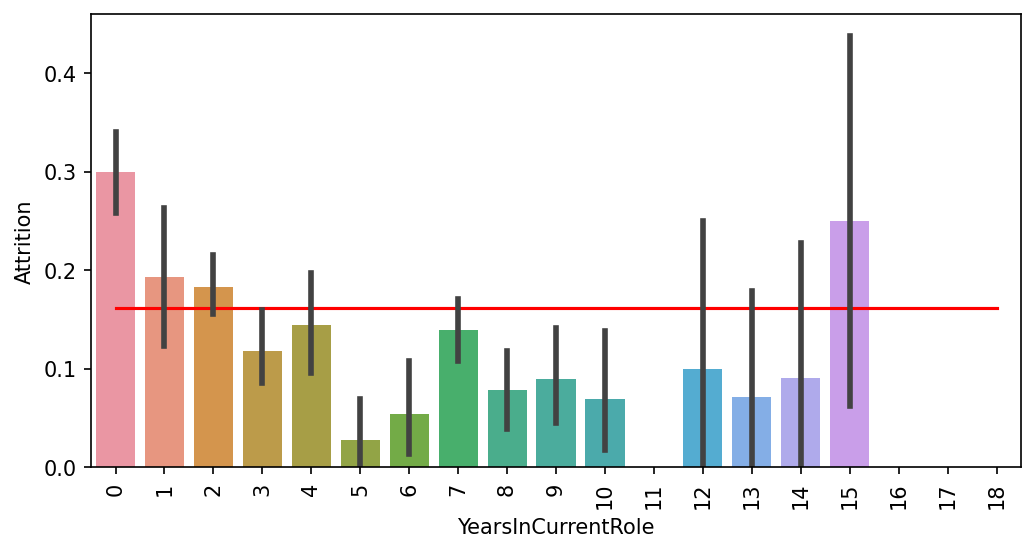

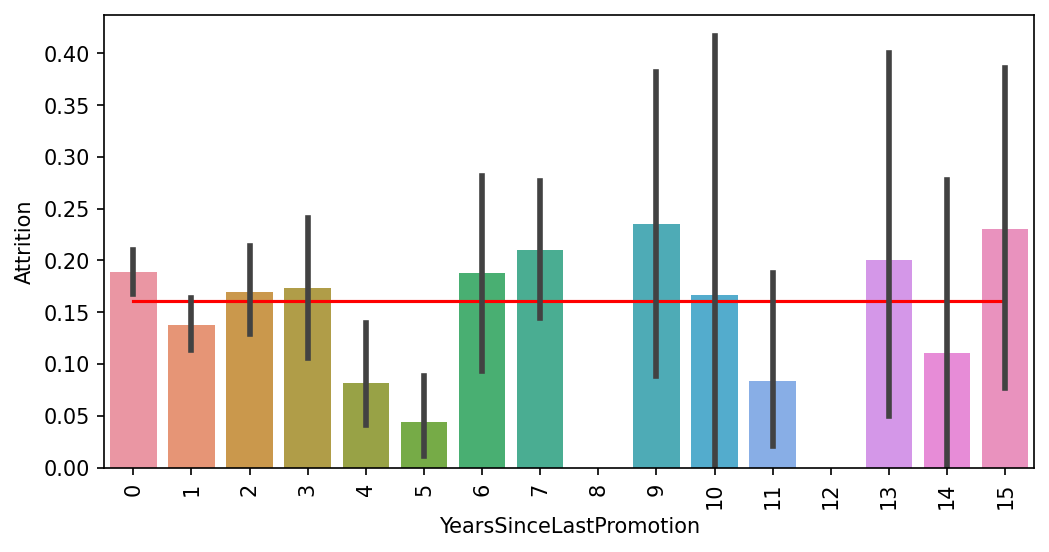

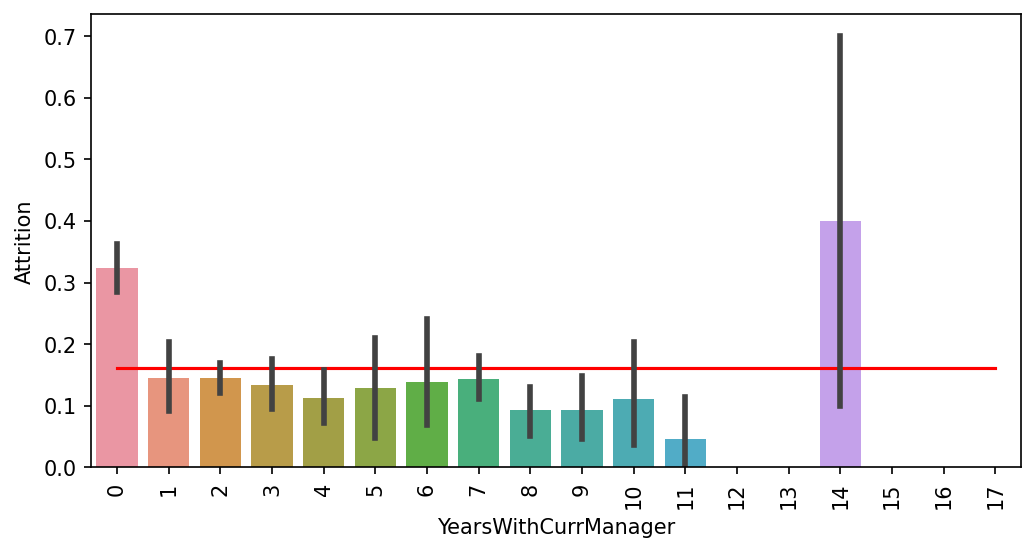

In [64]:
X_char_merged=pd.concat([char, y],axis=1,join='inner')

for col in char.columns:
    plt.figure(figsize=(8, 4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='Attrition', data=X_char_merged, estimator=np.mean)
    plt.xticks(rotation=90)
plt.show()

In [65]:
char = char.drop(['Gender','Education','PerformanceRating'],axis=1)

In [66]:
char.dtypes

BusinessTravel              object
Department                  object
EducationField              object
JobRole                     object
MaritalStatus               object
OverTime                    object
EnvironmentSatisfaction      int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [67]:
char['EnvironmentSatisfaction']=char['EnvironmentSatisfaction'].astype('object')
char['JobInvolvement']=char['JobInvolvement'].astype('object')
char['JobLevel']=char['JobLevel'].astype('object')
char['JobSatisfaction']=char['JobSatisfaction'].astype('object')
char['NumCompaniesWorked']=char['NumCompaniesWorked'].astype('object')
char['PercentSalaryHike']=char['PercentSalaryHike'].astype('object')
char['RelationshipSatisfaction']=char['RelationshipSatisfaction'].astype('object')
char['StockOptionLevel']=char['StockOptionLevel'].astype('object')
char['TrainingTimesLastYear']=char['TrainingTimesLastYear'].astype('object')
char['WorkLifeBalance']=char['WorkLifeBalance'].astype('object')
char['YearsInCurrentRole']=char['YearsInCurrentRole'].astype('object')
char['YearsSinceLastPromotion']=char['YearsSinceLastPromotion'].astype('object')
char['YearsWithCurrManager']=char['YearsWithCurrManager'].astype('object')

In [68]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2940, 121)

In [69]:
X_char_dum.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,...,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1> Creating the Master Feature Set for Model Development

In [70]:
X_all = pd.concat([num, X_char_dum], axis=1, join="inner")

In [71]:
X_all.head()

,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,NumCompaniesWorked_1,NumCompaniesWorked_2,...,YearsInCurrentRole_11,YearsInCurrentRole_12,YearsInCurrentRole_13,YearsInCurrentRole_14,YearsInCurrentRole_15,YearsInCurrentRole_16,YearsInCurrentRole_17,YearsInCurrentRole_18,YearsSinceLastPromotion_1,YearsSinceLastPromotion_2,YearsSinceLastPromotion_3,YearsSinceLastPromotion_4,YearsSinceLastPromotion_5,YearsSinceLastPromotion_6,YearsSinceLastPromotion_7,YearsSinceLastPromotion_8,YearsSinceLastPromotion_9,YearsSinceLastPromotion_10,YearsSinceLastPromotion_11,YearsSinceLastPromotion_12,YearsSinceLastPromotion_13,YearsSinceLastPromotion_14,YearsSinceLastPromotion_15,YearsWithCurrManager_1,YearsWithCurrManager_2,YearsWithCurrManager_3,YearsWithCurrManager_4,YearsWithCurrManager_5,YearsWithCurrManager_6,YearsWithCurrManager_7,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41.0,2.0,5993.0,8.0,6.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,43.0,8.0,5130.0,10.0,9.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,37.0,2.0,2911.0,7.0,3.0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,33.0,3.0,2911.0,8.0,8.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,2.0,3468.0,6.0,3.0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1> Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, y, test_size=0.25, random_state=101)

In [73]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("Attrition Rate in Training Data", y_train.mean())
print("Attrition Rate in Testing Data", y_test.mean())

Shape of Training Data (2205, 126)
Shape of Testing Data (735, 126)
Attrition Rate in Training Data 0.1655328798185941
Attrition Rate in Testing Data 0.14829931972789115


In [ ]:
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Black Box Ensemble Methods - Random Forest (With Bagging)

In [74]:
# Building a Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [75]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='accuracy')
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [76]:
dtree.set_params(criterion='entropy', max_depth=5, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, random_state=101)

In [77]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, random_state=101)

In [78]:
pred = dtree.predict(X_test)

In [79]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

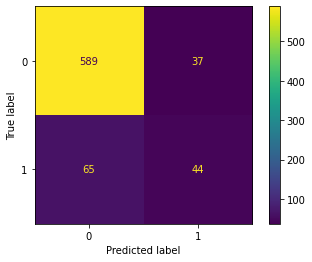

In [80]:
plot_confusion_matrix(dtree, X_test, y_test)

In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       626
           1       0.54      0.40      0.46       109

    accuracy                           0.86       735
   macro avg       0.72      0.67      0.69       735
weighted avg       0.85      0.86      0.85       735



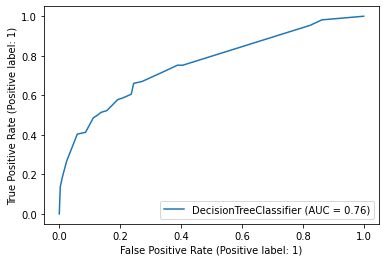

In [82]:
plot_roc_curve(dtree, X_test, y_test)

In [83]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [84]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [85]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy')
rforest_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [86]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 5,
                  warm_start = True)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       oob_score=True, random_state=101, warm_start=True)

In [87]:
min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(X_train, y_train)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

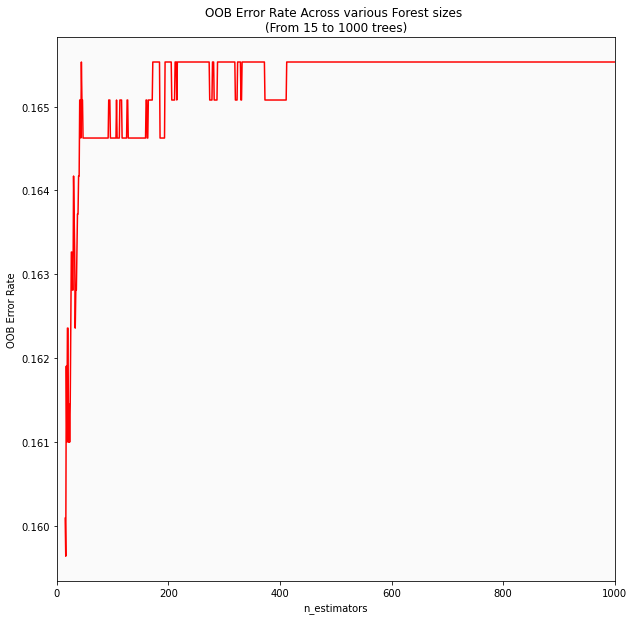

In [90]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [91]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 400 trees is: 0.16508


In [92]:
rforest.set_params(n_estimators=400,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=400, random_state=101)

In [93]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=400, random_state=101)

In [94]:
rforest_pred = rforest.predict(X_test)

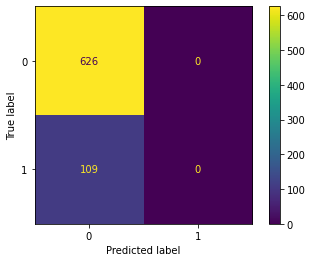

In [95]:
plot_confusion_matrix(rforest, X_test, y_test)

In [ ]:
#Decison Tree is found to be good model as Random Forest Recall is 0

In [96]:
from sklearn.svm import SVC

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [98]:
svm_model = SVC(class_weight='balanced', random_state=101,)

In [99]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'linear', 'poly'],
              'degree': [2, 3],
              'gamma': ['scale', 'auto']}

In [100]:
svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='accuracy')
svm_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

Best Parameters using grid search: 
 {'C': 100.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [102]:
svm_model.set_params(C=100.0, degree=2, gamma='scale', kernel='rbf')

SVC(C=100.0, class_weight='balanced', degree=2, random_state=101)

In [103]:
svm_model.fit(scaled_X_train, y_train)

SVC(C=100.0, class_weight='balanced', degree=2, random_state=101)

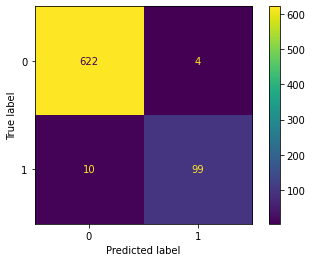

In [105]:
plot_confusion_matrix(svm_model, scaled_X_test, y_test)

In [106]:
pred = svm_model.predict(scaled_X_test)

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       626
           1       0.96      0.91      0.93       109

    accuracy                           0.98       735
   macro avg       0.97      0.95      0.96       735
weighted avg       0.98      0.98      0.98       735



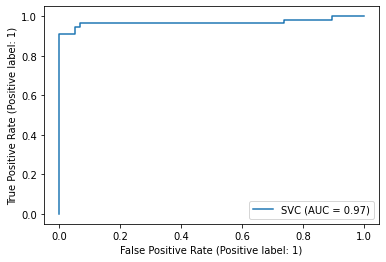

In [109]:
plot_roc_curve(svm_model, scaled_X_test, y_test)

In [ ]:
#SVM performs better than Decision True as Recall is improved also accuracy is 98%, AUC is 97%